In [248]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as st

In [51]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [52]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect
from sqlalchemy import and_

In [53]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [54]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [12]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [ ]:
# View all of the classes that automap found
Base.classes.keys()

In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [58]:
Measurement

sqlalchemy.ext.automap.measurement

In [40]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [24]:
#Create a connection
conn = engine.connect()

In [28]:
#Create df for each table
measurement_df = pd.read_sql("SELECT * FROM measurement", conn)
station_df = pd.read_sql("SELECT * FROM station",conn)

In [30]:
#Print head of both tables
station_df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [31]:
measurement_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


# Exploratory Precipitation Analysis

In [244]:
# Find the most recent date in the data set.
print(measurement_df['date'].max())

2017-08-23


In [178]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

2017-08-23 minus 1 year = 2016-08-23

In [245]:
# Perform a query to retrieve the data and precipitation scores
prec_dates = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prec_dates = pd.DataFrame(prec_dates)
prec_dates.rename(columns={0:'date',1:'prcp'},inplace=True)
prec_dates = prec_dates.set_index(['date'])
# Sort the dataframe by date
prec_dates = prec_dates.sort_values(by=['date'])
prec_dates = prec_dates.reset_index()

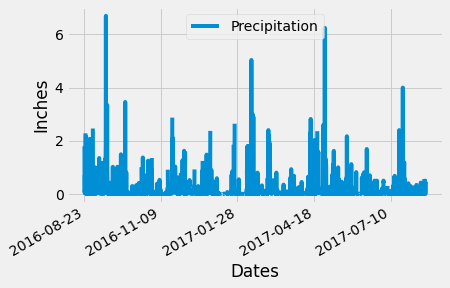

In [246]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = prec_dates.plot(x='date',y='prcp')
plt.ylabel('Inches') 
plt.xlabel('Dates')
plt.legend(['Precipitation'])
plt.gcf().autofmt_xdate()


In [250]:
# Use Pandas to calcualte the summary statistics for the precipitation data

# Exploratory Station Analysis

In [215]:
# Design a query to calculate the total number stations in the dataset
result = session.query(Station.station).count()
print("Count:", result)

Count: 9


In [217]:
session.query(Station.station).all()

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [255]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
# result = session.query(Measurement.station).value_counts()

# result = session.query(Measurement.station).all()
# pd.value_counts(result)

session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [268]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
print(session.query(Measurement.station,func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all())
print(session.query(Measurement.station,func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all())
print(session.query(Measurement.station,func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all())

[('USC00519281', 54.0)]
[('USC00519281', 85.0)]
[('USC00519281', 71.66378066378067)]


In [283]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temps = (session.query(Measurement.tobs).\
      filter(Measurement.station == 'USC00519281').\
      filter(Measurement.date >= '2016-08-18').all())
temps = pd.DataFrame(temps)

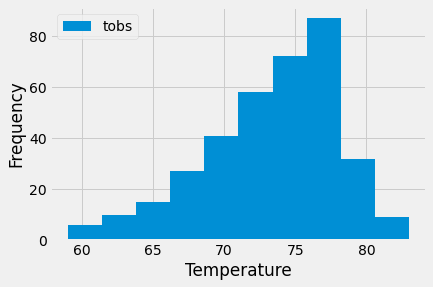

In [286]:
temps.plot(kind='hist')
plt.xlabel('Temperature')
plt.legend(['tobs'])

# Close session

In [287]:
# Close Session
session.close()